# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data. 

<img src=https://i.imgur.com/kq7hrEh.png>

In [63]:
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/fe/6b/db949ed5ac367987b1f250f070f340b7715d22f0c9c965bdf07de6ca75a3/scikit_learn-1.3.2-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.1 MB 4.1 MB/s eta 0:00:03
   - -------------------------------------- 0.4/9.1 MB 5.5 MB/s eta 0:00:02
   --- ------------------------------------ 0.9/9.1 MB 6.8 MB


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Import Statements

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [10]:
print(data.head())
print(f'Dataset contains {data.shape[0]} rows and {data.shape[1]} columns')
print(f'Are there any NaN values: {data.isnull().any().any()}')
print(f'Are there any duplicate rows: {data.duplicated().any()}')
print(data.dtypes)

   Rank Release_Date                     Movie_Title USD_Production_Budget  \
0  5293     8/2/1915           The Birth of a Nation              $110,000   
1  5140     5/9/1916                     Intolerance              $385,907   
2  5230   12/24/1916    20,000 Leagues Under the Sea              $200,000   
3  5299    9/17/1920  Over the Hill to the Poorhouse              $100,000   
4  5222     1/1/1925                  The Big Parade              $245,000   

  USD_Worldwide_Gross USD_Domestic_Gross  
0         $11,000,000        $10,000,000  
1                  $0                 $0  
2          $8,000,000         $8,000,000  
3          $3,000,000         $3,000,000  
4         $22,000,000        $11,000,000  
Dataset contains 5391 rows and 6 columns
Are there any NaN values: False
Are there any duplicate rows: False
Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget    object
USD_Worldwide_Gross      object
USD_

### Data Type Conversions

Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [11]:
columns_to_convert = ['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']
for column in columns_to_convert:
    data[column] = pd.to_numeric(data[column].str.replace('[\$,]', '', regex=True), errors='coerce')
data.head()

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Subhash_Jadhav\AppData\Local\Temp\ipykernel_9888\1727469983.py:3: SyntaxWarning: invalid escape sequence '\$'
  data[column] = pd.to_numeric(data[column].str.replace('[\$,]', '', regex=True), errors='coerce')


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


Convert the `Release_Date` column to a Pandas Datetime type. 

In [12]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'])

In [13]:
data.dtypes

Rank                              int64
Release_Date             datetime64[ns]
Movie_Title                      object
USD_Production_Budget             int64
USD_Worldwide_Gross               int64
USD_Domestic_Gross                int64
dtype: object

### Descriptive Statistics

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [22]:
print(f'Average production budget of the films: ${data['USD_Production_Budget'].mean()}')
print(f'Average worldwide gross revenue of films: ${data['USD_Worldwide_Gross'].mean()}')
print(f'Minimum of worldwide revenue: ${data['USD_Worldwide_Gross'].min()}')
print(f'Minimum of domestic revenue: ${data['USD_Domestic_Gross'].min()}')
print(f'Highest production budget: ${data['USD_Production_Budget'].max()}')
print(f'Highest worldwide gross revenue: ${data['USD_Worldwide_Gross'].max()}')

# Find the film with the highest budget
highest_budget_index = data['USD_Production_Budget'].idxmax()
highest_budget_movie = data.loc[highest_budget_index, 'Movie_Title']
highest_budget_revenue = data.loc[highest_budget_index, 'USD_Worldwide_Gross']

# Find the film with the lowest budget
lowest_budget_index = data['USD_Production_Budget'].idxmin()
lowest_budget_movie = data.loc[lowest_budget_index, 'Movie_Title']
lowest_budget_revenue = data.loc[lowest_budget_index, 'USD_Worldwide_Gross']

# Display the results
print(f'Highest Budget Film: {highest_budget_movie} | Revenue: ${highest_budget_revenue}')
print(f'Lowest Budget Film: {lowest_budget_movie} | Revenue: ${lowest_budget_revenue}')


Average production budget of the films: $31113737.57837136
Average worldwide gross revenue of films: $88855421.96271564
Minimum of worldwide revenue: $0
Minimum of domestic revenue: $0
Highest production budget: $425000000
Highest worldwide gross revenue: $2783918982
Highest Budget Film: Avatar | Revenue: $2783918982
Lowest Budget Film: My Date With Drew | Revenue: $181041


# Investigating the Zero Revenue Films

How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [24]:
print(f'Number of films with grossed $0 domestically: {(data['USD_Domestic_Gross'] == 0).sum()}')
print('Films with grossed $0 domestically: ', data[data['USD_Domestic_Gross'] == 0]['Movie_Title'].tolist())

Number of films with grossed $0 domestically: 512
Films with grossed $0 domestic:  ['Intolerance', 'Wings', "Hell's Angels", 'Charge of the Light Brigade, The', 'How Green Was My Valley', 'Alice in Wonderland', 'The King’s Thief', 'Carousel', 'Diane', '12 Angry Men', 'Barbarella', 'Waterloo', 'Bananas', '1776', 'Death Race 2000', 'Damnation Alley', 'The Toxic Avenger', 'My Beautiful Laundrette', 'The Brave Little Toaster', 'Going Under', 'Men of War', 'Everything Put Together', 'Pandaemonium', 'Batman - The Movie', 'The Hole', 'Pendulum', 'Crop Circles: Quest for Truth', 'Manito', "The Party's Over", "Ripley's Game", 'Nothing', 'Flywheel', 'The Touch', 'Grand Theft Parsons', 'Freeze Frame', 'George and the Dragon', 'The I Inside', 'Samantha: An American Girl Holiday', 'Wal-Mart: The High Cost of Low Price', 'Show Me', 'Proud', '11:14', 'Dungeons & Dragons: Wrath of the Dragon God', 'Chicken Tikka Masala', 'Insomnia Manica', 'The Call of Cthulhu', 'The Secret', 'Fetching Cody', 'High Sc

How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [25]:
print(f'Number of films with grossed $0 internationally: {(data['USD_Worldwide_Gross'] == 0).sum()}')
print('Films with grossed $0 internationally: ', data[data['USD_Worldwide_Gross'] == 0]['Movie_Title'].tolist())

Number of films with grossed $0 internationally: 357
Films with grossed $0 internationally:  ['Intolerance', 'Wings', "Hell's Angels", 'Charge of the Light Brigade, The', 'How Green Was My Valley', 'Alice in Wonderland', 'The King’s Thief', 'Diane', '12 Angry Men', 'Barbarella', 'Waterloo', 'Bananas', '1776', 'Death Race 2000', 'Damnation Alley', 'The Toxic Avenger', 'My Beautiful Laundrette', 'The Brave Little Toaster', 'Going Under', 'Men of War', 'Pandaemonium', 'Batman - The Movie', 'Pendulum', 'Crop Circles: Quest for Truth', 'Manito', "The Party's Over", "Ripley's Game", 'Flywheel', 'Grand Theft Parsons', 'George and the Dragon', 'The I Inside', 'Samantha: An American Girl Holiday', 'Show Me', 'Proud', '11:14', 'Insomnia Manica', 'The Call of Cthulhu', 'The Secret', 'Fetching Cody', 'High School Musical', 'The Blood of My Brother: A Story of Death in Iraq', 'Iraq for Sale: The War Profiteers', 'Jimmy and Judy', 'The Magic Flute', 'Farce of the Penguins', 'Partition', 'Sublime', '

### Filtering on Multiple Conditions

In [26]:
international_releases = data.loc[(data.USD_Domestic_Gross == 0) &
                                  (data.USD_Worldwide_Gross != 0)]
international_releases.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [27]:
international_releases = data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')
international_releases.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


### Unreleased Films

* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [35]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')
future_releases = data[data['Release_Date'] > scrape_date]
print(future_releases)


      Rank Release_Date                     Movie_Title  \
5384   321   2018-09-03               A Wrinkle in Time   
5385   366   2018-10-08                  Amusement Park   
5386  2950   2018-10-08                             Meg   
5387   126   2018-12-18                         Aquaman   
5388    96   2020-12-31                     Singularity   
5389  1119   2020-12-31          Hannibal the Conqueror   
5390  2517   2020-12-31  Story of Bonnie and Clyde, The   

      USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross  
5384              103000000                    0                   0  
5385              100000000                    0                   0  
5386               15000000                    0                   0  
5387              160000000                    0                   0  
5388              175000000                    0                   0  
5389               50000000                    0                   0  
5390               20000000   

In [37]:
data_clean = data.drop(future_releases.index)

### Films that Lost Money

What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [38]:
lost_percentage = (data_clean['USD_Production_Budget'] > data_clean['USD_Worldwide_Gross']).mean() * 100
print(lost_percentage)

37.27711738484398


# Seaborn for Data Viz: Bubble Charts

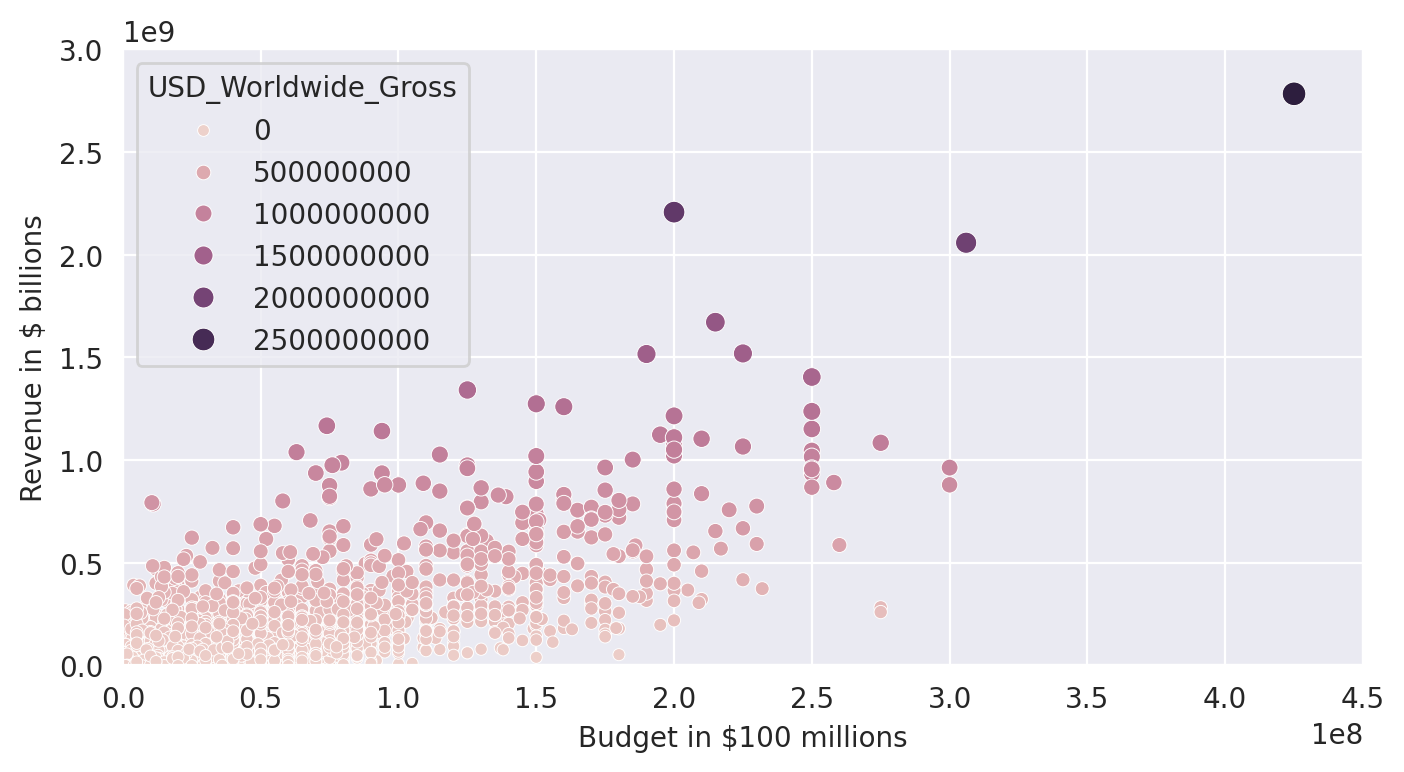

In [45]:
plt.figure(figsize=(8,4), dpi=200)
 
# set styling on a single chart
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                       x='USD_Production_Budget', 
                       y='USD_Worldwide_Gross',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')
 
  ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')

### Plotting Movie Releases over Time

Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



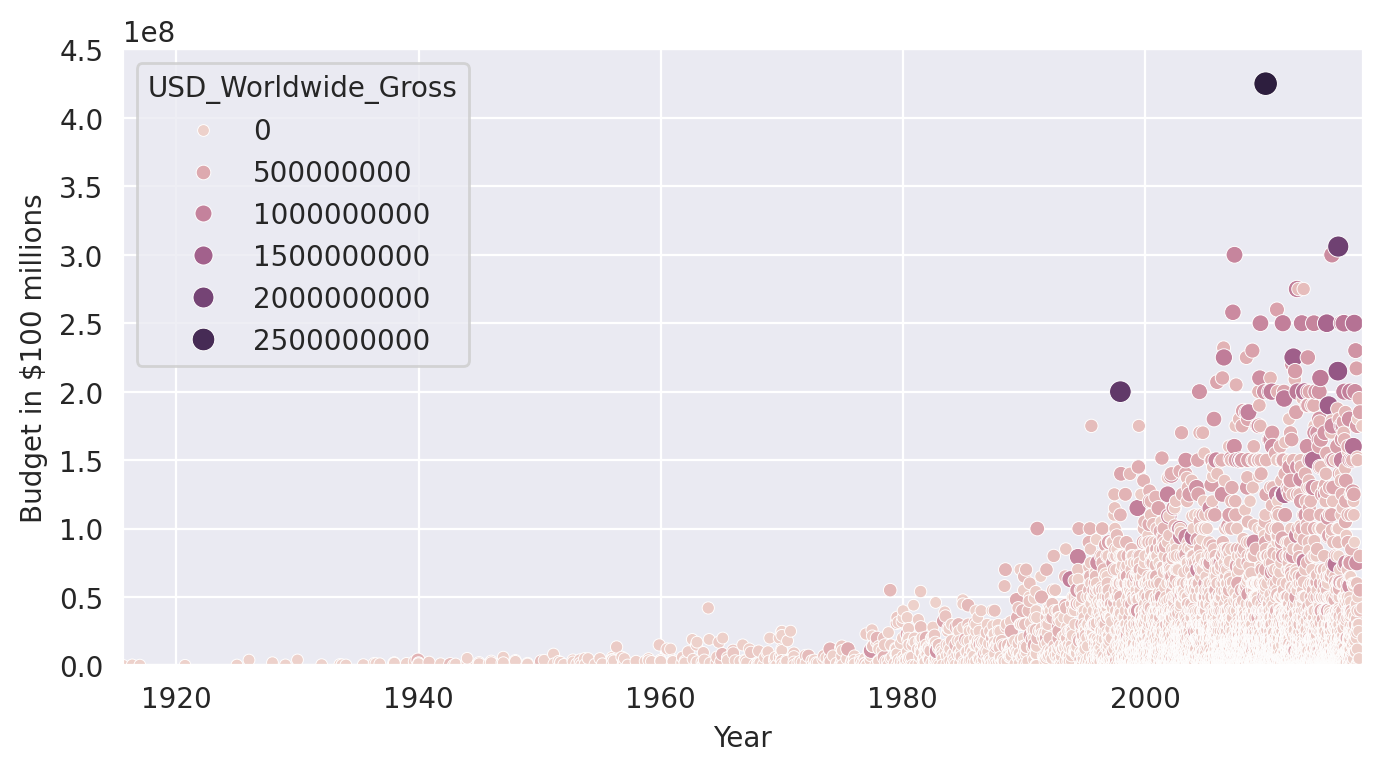

In [47]:
plt.figure(figsize=(8,4), dpi=200)
 
# set styling on a single chart
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                       x='Release_Date', 
                       y='USD_Production_Budget',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')
 
  ax.set(ylim=(0, 450000000),
           xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
           xlabel='Year',
           ylabel='Budget in $100 millions')
 

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [49]:
data_clean['Decade'] = (data_clean['Release_Date'].dt.year // 10) * 10
data_clean.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [56]:
# Create 'old_films' DataFrame for films before 1970
old_films = data_clean[data_clean['Release_Date'].dt.year <= 1969]

# Create 'new_films' DataFrame for films from 1970 onwards
new_films = data_clean[data_clean['Release_Date'].dt.year >= 1970]

print(f'Number of films released prior to 1970: {len(old_films)}')
print(f'Most expensive film made prior to 1970: {old_films.loc[old_films['USD_Production_Budget'].idxmax()]['Movie_Title']}')

Number of films released prior to 1970: 153
Most expensive film made prior to 1970: Cleopatra


# Seaborn Regression Plots

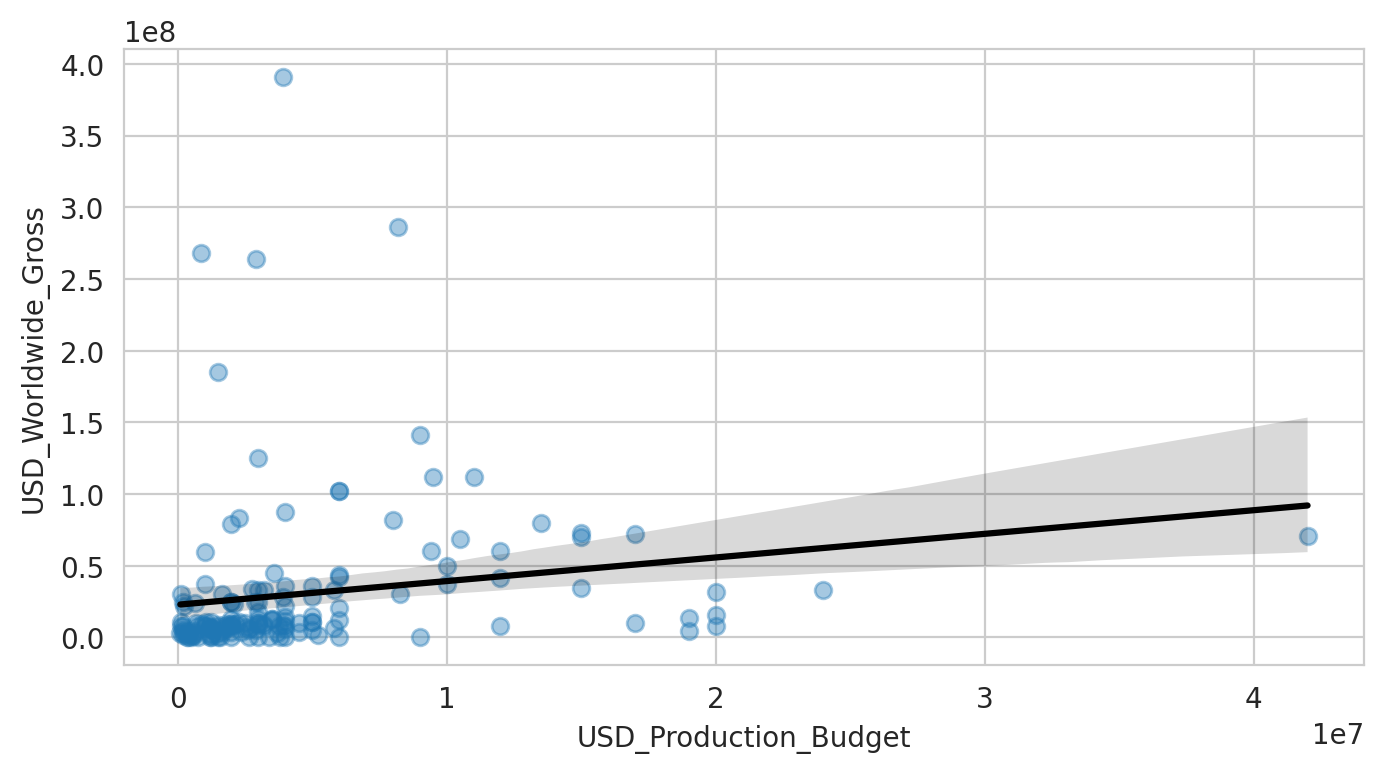

In [57]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=old_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

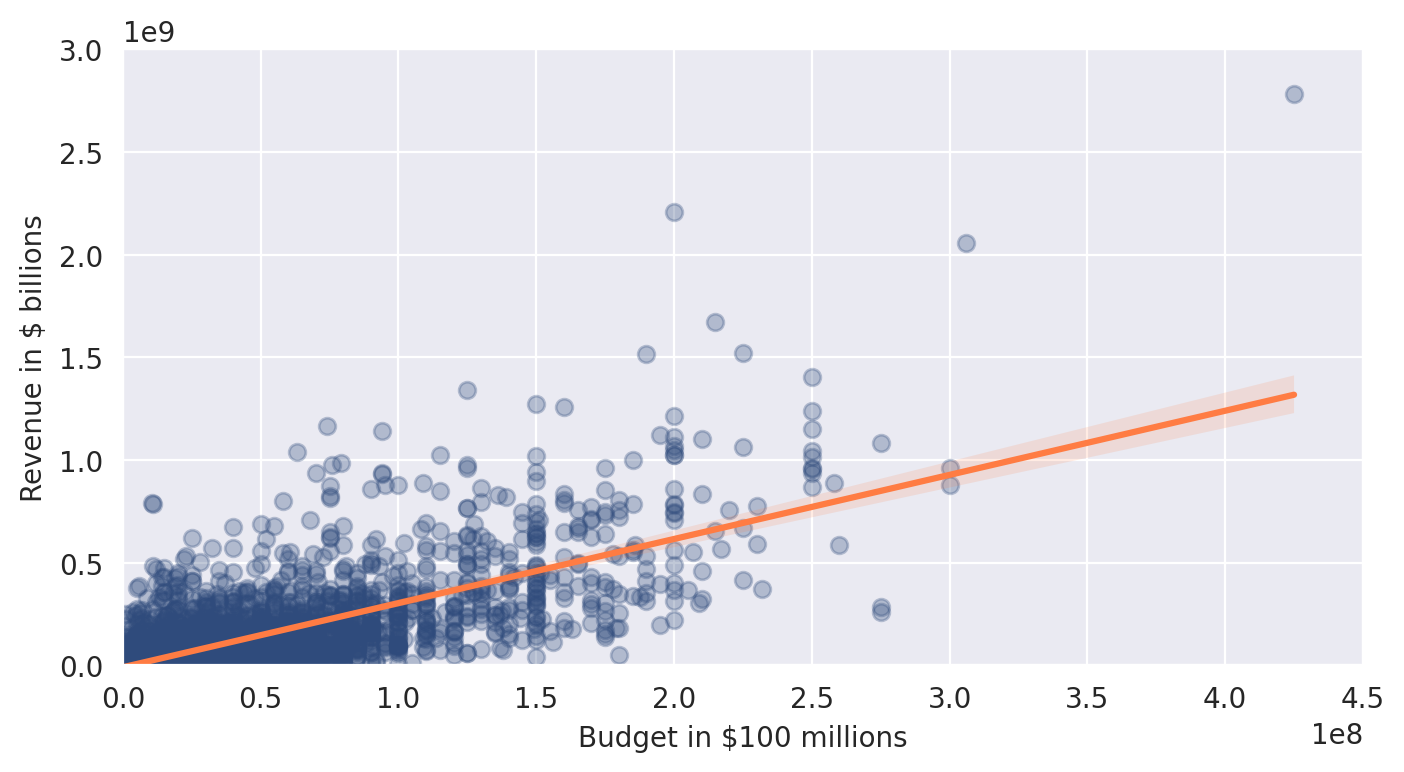

In [62]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
  ax = sns.regplot(data=new_films,
                   x='USD_Production_Budget',
                   y='USD_Worldwide_Gross',
                   color='#2f4b7c',
                   scatter_kws = {'alpha': 0.3},
                   line_kws = {'color': '#ff7c43'})
  
  ax.set(ylim=(0, 3000000000),
         xlim=(0, 450000000),
         ylabel='Revenue in $ billions',
         xlabel='Budget in $100 millions') 

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [70]:
regression = LinearRegression()
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
 
# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross']) 

# Find the best-fit line
regression.fit(X, y)

print(regression.intercept_)
print(regression.coef_)

# R-squared
regression.score(X, y)

[-8650768.00661042]
[[3.12259592]]


0.5577032617720403

Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [71]:
regression = LinearRegression()
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
 
# Response Variable or Target
y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross']) 

# Find the best-fit line
regression.fit(X, y)

print(regression.intercept_)
print(regression.coef_)

# R-squared
regression.score(X, y)

[22821538.63508039]
[[1.64771314]]


0.02937258620576877

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

How much global revenue does our model estimate for a film with a budget of $350 million? 

In [72]:
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a $350 film is around ${revenue_estimate:.10}.')

The estimated revenue for a $350 film is around $600000000.0.
